In [26]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
import pickle
import matplotlib.pyplot as plt

In [27]:
folder1=r'D:\Datasets\catsDogs\train\cat'
folder2=r'D:\Datasets\catsDogs\train\dog'

## Preprocessing and feature description

In [28]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [54]:
i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)

    #resize image
    resize=(128, 64)
    img=cv2.resize(a,resize)

    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(3, 3),0)#gaussian Image

    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    #initialise hog descriptor

    cell_size = (16, 16)  # h x w in pixels 
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

    

    # winSize is the size of the image cropped to an multiple of the cell size
    # cell_size is the size of the cells of the img patch over which to calculate the histograms
    # block_size is the number of cells which fit in the patch
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)


    descriptor = hog.compute(img_prewitt)

    #norm = Normalizer()
    #normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1

    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('output/hog_positive.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (756, 1)
descriptor shape  1  :  (756, 1)
descriptor shape  2  :  (756, 1)
descriptor shape  3  :  (756, 1)
descriptor shape  4  :  (756, 1)
descriptor shape  5  :  (756, 1)
descriptor shape  6  :  (756, 1)
descriptor shape  7  :  (756, 1)
descriptor shape  8  :  (756, 1)
descriptor shape  9  :  (756, 1)
descriptor shape  10  :  (756, 1)
descriptor shape  11  :  (756, 1)
descriptor shape  12  :  (756, 1)
descriptor shape  13  :  (756, 1)
descriptor shape  14  :  (756, 1)
descriptor shape  15  :  (756, 1)
descriptor shape  16  :  (756, 1)
descriptor shape  17  :  (756, 1)
descriptor shape  18  :  (756, 1)
descriptor shape  19  :  (756, 1)
descriptor shape  20  :  (756, 1)
descriptor shape  21  :  (756, 1)
descriptor shape  22  :  (756, 1)
descriptor shape  23  :  (756, 1)
descriptor shape  24  :  (756, 1)
descriptor shape  25  :  (756, 1)
descriptor shape  26  :  (756, 1)
descriptor shape  27  :  (756, 1)
descriptor shape  28  :  (756, 1)
descriptor shape  29  : 

In [52]:
print(img_prewitt.shape)
print(descriptor.shape)

(64, 128)
(756,)


In [55]:
data1 = pd.read_csv(r'output/hog_positive.csv',header=None,dtype='float64')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data1=data1.astype(np.float64)
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0
0,0.318667
1,0.099782
2,0.036944
3,0.012675
4,0.027983
...,...
71815,0.253702
71816,0.100809
71817,0.032385
71818,0.038910


In [57]:
i=0
for filename in os.listdir(folder2):

    path=os.path.join(folder2,filename)
    a=cv2.imread(path)

    #resize image
    resize=(128, 64)
    img=cv2.resize(a,resize)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(3, 3),0)#gaussian Image

    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    #initialise sift descriptor
    cell_size = (16, 16)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

    # winSize is the size of the image cropped to an multiple of the cell size
    # cell_size is the size of the cells of the img patch over which to calculate the histograms
    # block_size is the number of cells which fit in the patch
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)


    descriptor = hog.compute(img_prewitt)
    out=pd.DataFrame(descriptor)

    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('output/hog_negative.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (756, 1)
descriptor shape  1  :  (756, 1)
descriptor shape  2  :  (756, 1)
descriptor shape  3  :  (756, 1)
descriptor shape  4  :  (756, 1)
descriptor shape  5  :  (756, 1)
descriptor shape  6  :  (756, 1)
descriptor shape  7  :  (756, 1)
descriptor shape  8  :  (756, 1)
descriptor shape  9  :  (756, 1)
descriptor shape  10  :  (756, 1)
descriptor shape  11  :  (756, 1)
descriptor shape  12  :  (756, 1)
descriptor shape  13  :  (756, 1)
descriptor shape  14  :  (756, 1)
descriptor shape  15  :  (756, 1)
descriptor shape  16  :  (756, 1)
descriptor shape  17  :  (756, 1)
descriptor shape  18  :  (756, 1)
descriptor shape  19  :  (756, 1)
descriptor shape  20  :  (756, 1)
descriptor shape  21  :  (756, 1)
descriptor shape  22  :  (756, 1)
descriptor shape  23  :  (756, 1)
descriptor shape  24  :  (756, 1)
descriptor shape  25  :  (756, 1)
descriptor shape  26  :  (756, 1)
descriptor shape  27  :  (756, 1)
descriptor shape  28  :  (756, 1)
descriptor shape  29  : 

In [58]:
data2= pd.read_csv(r'output/hog_negative.csv',header=None,dtype='float64')
data2=data2.astype(np.float64)
data2

,0
0,0.031364
1,0.016210
2,0.019057
3,0.074629
4,0.285385
...,...
136075,0.193705
136076,0.253223
136077,0.253223
136078,0.253223


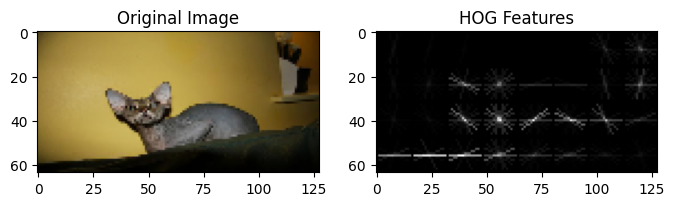

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load the image
image = cv2.imread(path)

#resize image
resize=(128, 64)
img=cv2.resize(image, resize)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2= cv2.GaussianBlur(gray,(3, 3),0)#gaussian Image

img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal
img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
img_prewitt = img_prewittx + img_prewitty

# Calculate HOG features
hog_descriptor, hog_image = hog(img_prewitt, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

# Plot the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Plot the HOG features
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Features')
plt.show()


In [17]:
data=data1.append(data2)

AttributeError: 'DataFrame' object has no attribute 'append'

In [45]:
csv_data=data.to_csv('/content/drive/MyDrive/Colab Notebooks/Hog_Final.csv', mode='a', header=False,index=False)

NameError: name 'data' is not defined

In [46]:
data= pd.read_csv(r'output\hog_negative.csv',header=None,dtype='float64')
data=data.astype(np.float64)
data

,0
0,0.100448
1,0.071046
2,0.076852
3,0.168173
4,0.276815
...,...
19435,0.239019
19436,0.182342
19437,0.150770
19438,0.122521


In [47]:
wcss = []
clus=[]
j=0
for i in range(3, 10, 2):
   kmeans_hog = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
   kmeans_hog.fit(data)
   wcss.append(kmeans_hog.inertia_)
   clus.append(i)
   print(i,": ",wcss[j])
   j+=1

3 :  9.147557451938296
5 :  4.162421720590625
7 :  2.266765264145808
9 :  1.4035294556357458


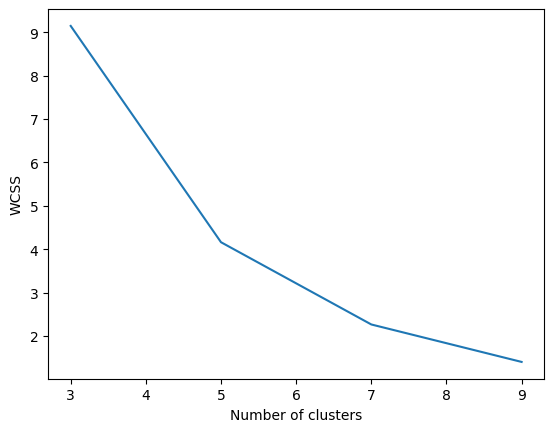

In [48]:
plt.plot(range(3, 10, 2), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (4,)

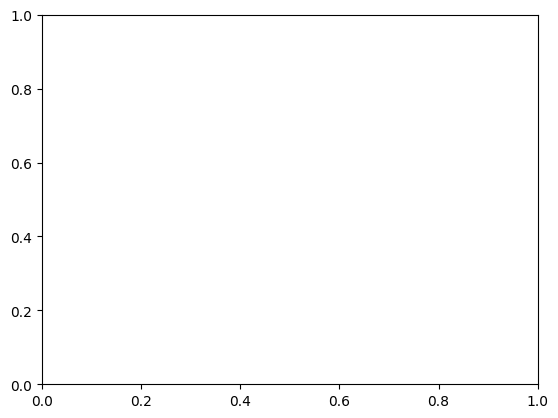

In [49]:
plt.plot(range(3, 23, 2), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans_hog = KMeans(n_clusters=15, random_state= 0)
kmeans_hog.fit(data)

KMeans(n_clusters=15, random_state=0)

In [ ]:
#kmeans_hog.inertia_

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = '/content/drive/MyDrive/Colab Notebooks/Kmeans_CL_15_HOG_Model.sav'
pickle.dump(kmeans_hog, open(filename, 'wb'))

In [ ]:
hist=np.histogram(kmeans_hog.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])


print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([ 71357, 133345,  96721,  59546,  97578,  68387,  25517,  61092,
       113430,  97909,  82544, 119231,   6143,  63569, 127163]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])) 



In [ ]:
#folder1=r"D:/StrData/Str"
#folder2=r"D:\StrData\Nstr"
#from sklearn.preprocessing import Normalizer
filename2 = '/content/drive/MyDrive/Colab Notebooks/Kmeans_CL_15_HOG_Model.sav'
kmeans_hog = pickle.load(open(filename2, 'rb'))


# Training ,Testing & Classification

In [ ]:
data= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HS_Final.csv',header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.145547,-0.057869,0.016348,-0.024295,0.116402,-0.028196,0.024867,-0.013303,-0.016035,0.036206,...,0.025715,-0.010219,0.007133,-0.007419,0.017970,-0.007061,-0.006962,0.008638,-0.010675,0
1,-0.115639,-0.056552,0.041447,0.000271,0.060353,-0.035269,0.009068,-0.009756,-0.027834,0.000849,...,0.007413,-0.043074,-0.005094,0.020154,-0.012466,-0.008250,-0.026498,0.009055,-0.010346,0
2,-0.114857,-0.053884,-0.037216,-0.038191,-0.002354,-0.050284,-0.027002,0.045697,-0.067747,-0.027469,...,0.028841,-0.040946,0.008318,-0.000395,0.017426,-0.010496,-0.016801,-0.004286,-0.022676,0
3,-0.098354,-0.092104,0.009216,-0.021570,0.021361,-0.042655,0.058744,0.001973,-0.069565,0.032064,...,-0.011212,-0.026946,-0.006799,0.005865,-0.014270,-0.027486,-0.016843,0.014328,0.010695,0
4,-0.115755,-0.050824,0.051047,-0.002826,0.077547,-0.047789,0.022950,-0.002401,-0.031170,0.033295,...,0.011240,-0.006784,0.021771,-0.009327,0.022148,-0.028901,-0.032458,0.021247,0.004857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11324,0.070051,-0.001003,0.044423,-0.052612,0.030983,0.027020,0.023744,0.003720,-0.072507,-0.002377,...,-0.016641,-0.019355,-0.000374,-0.042269,-0.005646,-0.019359,-0.015728,0.001887,-0.002825,1
11325,-0.004429,-0.118285,-0.001649,-0.031041,0.090958,0.013757,0.023236,-0.050646,-0.019287,-0.036848,...,0.002376,-0.003488,0.025687,-0.026069,-0.012677,-0.027542,-0.014326,-0.014990,-0.008672,1
11326,0.051346,-0.054626,-0.029596,-0.052890,0.040402,-0.017995,0.001041,0.034696,-0.110814,-0.065152,...,0.015301,-0.003338,0.016290,-0.004141,-0.004257,-0.007783,0.014785,0.003657,0.027914,1
11327,-0.038242,-0.030308,-0.010952,0.018182,0.062707,0.014500,0.034568,0.075119,-0.092458,-0.032877,...,0.003363,-0.004987,0.002237,-0.048081,0.022284,-0.047038,-0.011092,-0.005374,-0.000176,1


In [ ]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:27].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,27]
print("Y values")
print(y)

X values
[[-1.45546621e-01 -5.78690319e-02  1.63478261e-02 ... -6.96246031e-03
   8.63789095e-03 -1.06746440e-02]
 [-1.15639488e-01 -5.65520354e-02  4.14472346e-02 ... -2.64978061e-02
   9.05541042e-03 -1.03457041e-02]
 [-1.14856642e-01 -5.38843540e-02 -3.72160166e-02 ... -1.68010982e-02
  -4.28614590e-03 -2.26756793e-02]
 ...
 [ 5.13457343e-02 -5.46255503e-02 -2.95957978e-02 ...  1.47850031e-02
   3.65661488e-03  2.79139366e-02]
 [-3.82423758e-02 -3.03080892e-02 -1.09523737e-02 ... -1.10919375e-02
  -5.37444857e-03 -1.76399424e-04]
 [-3.61527865e-02 -3.60646243e-02 -2.11095103e-02 ... -3.71845345e-02
  -8.95617199e-05  3.92362930e-03]]
Y values
0        0
1        0
2        0
3        0
4        0
        ..
11324    1
11325    1
11326    1
11327    1
11328    1
Name: 27, Length: 11329, dtype: int64


In [ ]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix

### Classification using 4 classifiers.

Decision Tree Results
Train Accuracy: 0.8115414321968443
Test Accuracy: 0.6690203000882613
Precision Score:  0.7129367327667611
Recall Score:  0.6286427976686095
True Negative Rate:  0.7145539906103286
False Positive Rate:  0.28544600938967135
F2 Score:  0.643868326795156
F1 Score:  0.668141592920354
Confusion Matrix: 
[[761 304]
 [446 755]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc5205410>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


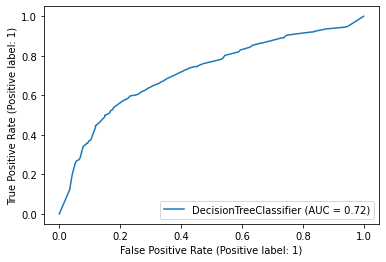

In [ ]:
#Decision Tree Classifier
model1 = DecisionTreeClassifier(max_depth=9)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
CM = confusion_matrix(y_test, y_pred1)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1)) # true positive rate, Sensitivity
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("ROC curve ",metrics.plot_roc_curve(model1,x_test, y_test))
filename = 'DT_Model.pkl'
pickle.dump(model1, open(filename, 'wb'))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.7466902030008826
Precision Score:  0.7742782152230971
Recall Score:  0.7368859283930058
True Negative Rate:  0.7577464788732394
False Positive Rate:  0.24225352112676057
F2 Score:  0.7440726416680679
F1 Score:  0.7551194539249148
Confusion Matrix: 
[[807 258]
 [316 885]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc51c2610>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


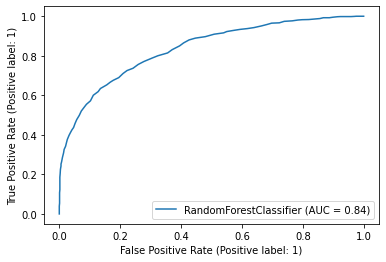

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
CM = confusion_matrix(y_test, y_pred2)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out or false positive rate

print("Random Forest Clasifier")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2)) #True positive rate
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred2, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))
print("ROC curve ",metrics.plot_roc_curve(model2,x_test, y_test))
filename = 'RF_Model.pkl'
pickle.dump(model2, open(filename, 'wb'))

KNN
Train Accuracy: 0.801941961822796
Test Accuracy: 0.7740511915269197
Precision Score:  0.7736298649722002
Recall Score:  0.8109908409658618
True Negative Rate:  0.7323943661971831
False Positive Rate:  0.2676056338028169
F2 Score:  0.8032327230743856
F1 Score:  0.7918699186991871
Confusion Matrix: 
[[780 285]
 [227 974]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc4a95a90>


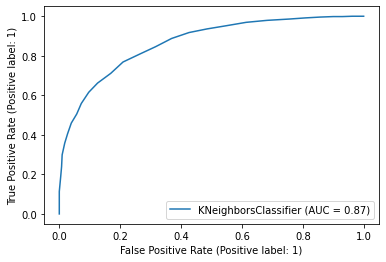

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 29)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
CM = confusion_matrix(y_test, y_pred3)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("KNN")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred3, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))
print("ROC curve ",metrics.plot_roc_curve(model3,x_test, y_test))
filename = 'KNN_Model.pkl'
pickle.dump(model3, open(filename, 'wb'))

Logistic Regression
Train Accuracy: 0.7092574202802604
Test Accuracy: 0.705648720211827
Precision Score:  0.7089201877934272
Recall Score:  0.7543713572023314
True Negative Rate:  0.6507042253521127
False Positive Rate:  0.3492957746478873
F2 Score:  0.7448207826372902
F1 Score:  0.7309398951189997
Confusion Matrix: 
[[693 372]
 [295 906]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc48feed0>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


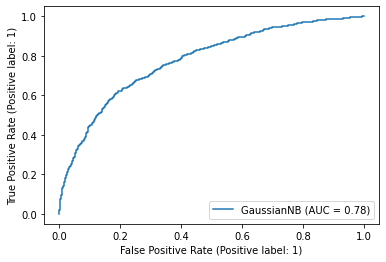

In [ ]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
CM = confusion_matrix(y_test, y_pred4)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("Logistic Regression")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred4, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4))
print("ROC curve ",metrics.plot_roc_curve(model4,x_test, y_test))
filename = 'NB_Model.pkl'
pickle.dump(model4, open(filename, 'wb'))

##### Repeat with k = 5 folds classification